In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from scipy.optimize import curve_fit
from astropy import units as u
from astropy import constants as const
import time
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from IPython.display import HTML



# Different initial mass functions

$\xi (m)\Delta$m is the the number of stars with masses in the range $m$ to ${\displaystyle m+\mathrm {d} m}$, within a specified volume of space. The Salpeter IMF, for example, is given as 

${\displaystyle \xi (m)\Delta m=\xi _{0}\left({\frac {m}{M_{\odot }}}\right)^{-2.35}\left({\frac {\Delta m}{M_{\odot }}}\right)}$,

and the Kroupa IMF has about the same index in the high-mass range, but flattens to $\alpha $ = 1.3 for M < 0.5 M$_{\odot}$. Both the Salpeter and Kroupa IMF are widely used IMFs.

Due to the extreme star-forming activity in starburst galaxies, an increased cosmic-ray density is expected. This enhanced population of cosmic rays could heat molecular clouds to significantly higher temperatures as opposed to the galactic molecular zones. An increased temperature for the molecular gas, however, results in a larger characteristic Jeans mass ($M_J$) given by the relation

\begin{equation}
    M_J = 0.9\left(\frac{\mathrm{T_k}}{10 ~\mathrm{K}}\right)\left[\frac{n_c(H_2)}{10^4~ \mathrm{cm}^{-3}}\right]~M_{\odot}.
\end{equation} 

As such, the star formation in regions with higher ambient temperatures should result in relatively more massive stars, as low-mass star formation is suppressed. This suggest top-heavy conditions in regions with strong starburst-activity.   




(0.001, 1000.0)

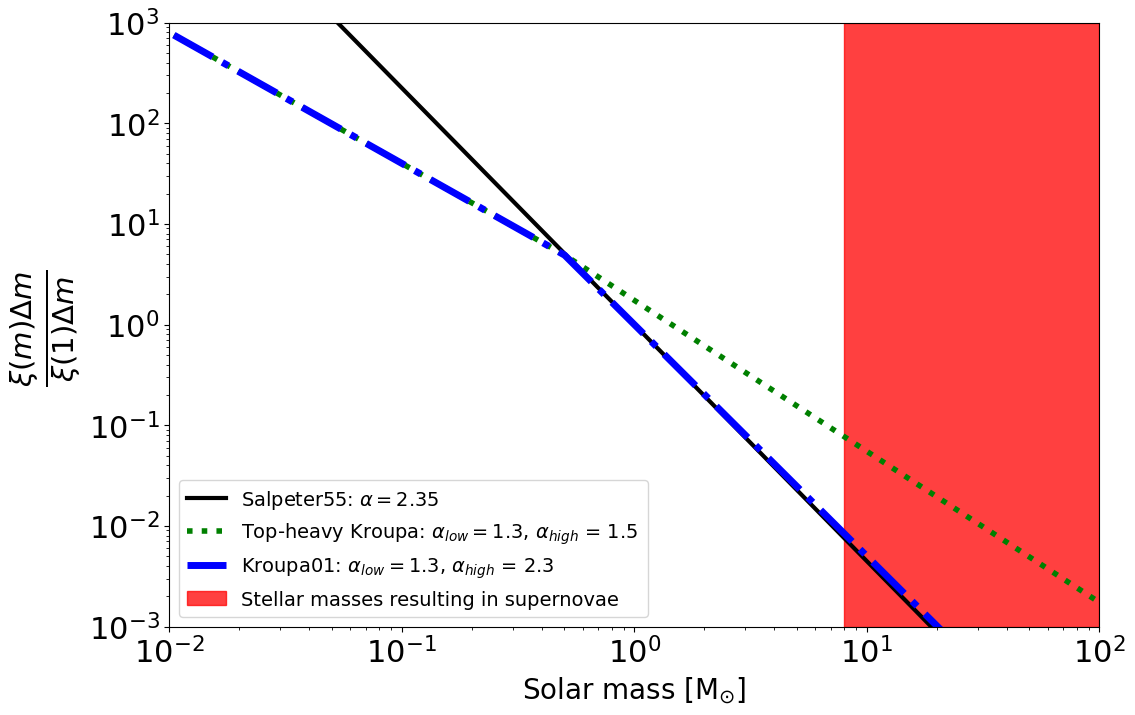

In [2]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

def salpeter(x, a):
    y = x**(-a)
    return y

def kroupa(x, a, b, c):
    y = np.array([])
    if len(x) != 1:
        for i in range(len(x)):
            if x[i] < 0.08:
                alpha = a
                yvalue = x[i]**(-alpha)
            elif 0.08 <= x[i] < 0.5:
                alpha = b
                yvalue = 0.08**-a * (x[i]/0.08)**-b
            elif 0.5 <= x[i]:
                alpha = c
                yvalue = 0.08**-a * (0.5/0.08)**-b * (x[i]/0.5)**-c
            y = np.append(y, yvalue)
    else:
        y = 0.08**-1.3 * (0.5/0.08)**-1.3 * (1/0.5)**-2.3
    return y

def salpeter55(m):
    alpha = 2.35
    return m**-alpha

def kroupa01(m):
    return np.where(m<0.08, m**(-1.3), np.where(m < 0.5, 0.08**(-1.3) * (m/0.08)**(-1.3), 0.08**(-1.3) * (0.5/0.08)**(-1.3) * (m/0.5)**(-2.3)))



xvalues = np.linspace(0.001, 10**2, 1000)
yvalues_salpeter = salpeter(xvalues, 2.3)
yvalues_kroupa = kroupa(xvalues, 1.3, 1.3, 2.3)
yvalues_Topkroupa = kroupa(xvalues, 1.3, 1.3, 1.5)
yvalues_Topsalpeter = salpeter(xvalues, 1.5)



plt.figure(1, [15,12])


plt.plot(xvalues, salpeter55(xvalues)/salpeter55(1), color ='k' , label = 'Salpeter55: $\\alpha = 2.35$', linewidth =3)
plt.plot(xvalues, yvalues_Topkroupa/kroupa([1], 1.3, 1.3, 1.5), 
         label = 'Top-heavy Kroupa: $\\alpha_{low} = 1.3 $, $\\alpha_{high}$ = 1.5 ', color = 'g', linestyle = 'dotted', linewidth = 4)
plt.plot(xvalues, kroupa01(xvalues)/kroupa01(1), color = 'b', linestyle = 'dashdot',linewidth = 5,label = 'Kroupa01: $\\alpha_{low} = 1.3 $, $\\alpha_{high}$ = 2.3 ')
plt.axvspan(8,100,color = 'red',alpha = 0.75, label = 'Stellar masses resulting in supernovae')


plt.legend(fontsize = 14)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('Solar mass [M$_{\odot}$]',fontsize = 20)
plt.ylabel('$\\frac{ \\xi(m)\\Delta m}{\\xi(1)\\Delta m}$ ', fontsize = 30)
plt.xlim([1e-2,1e2])
plt.ylim([1e-3,1e3])




# Supernova simulations

In [3]:
SN = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Kroupa_10solM/YM.snr1",skiprows = 8)
SN_1M_Kroupa =  np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Kroupa_1solM/YM_1Mcont_Kroupa.snr1",skiprows = 8)
SN_1M_TopHeavy =  np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_TopHeavy_1solM/YM_1Mcont_TopHeavy.snr1",skiprows = 8)
SN_1M_Salpeter = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Salpeter_1solM/Salpeter_normal.snr1", skiprows = 8)
SN_1M_Kroupa_30BH =  np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Kroupa_1solM_30BH/YM_1Mcont_Kroupa_30BH.snr1",skiprows = 8)
SN_1M_HeavyTopHeavy =  np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_HeavyTopHeavy_1solM/HeavyTopHeavy_1solM.snr1",skiprows = 8)
SN_1M_NK_40BH =  np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_NK_1M_40BH/YM_NK_1M_40BH.snr1",skiprows = 8)
SN_1M_TH_40BH =  np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_TH_1M_40BH/YM_TH_1M_40BH.snr1",skiprows = 8)


Important note: the starburst99 model (see: https://www.stsci.edu/science/starburst99/docs/default.htm) was used to generate the plots found below.

In [4]:
SN_10M_Kroupa_time = np.array([i[0] for i in SN])
SN_rate_10M_Kroupa = [pow(10,i[1]) for i in SN]

In [5]:
## 1 solar mass normal Kroupa ##
SN_1M_Kroupa_time = np.array([i[0] for i in SN_1M_Kroupa])
SN_rate_1M_Kroupa = [pow(10,i[1]) for i in SN_1M_Kroupa]

SN_1M_Kroupa_time_60Myr = np.array([i for i in SN_1M_Kroupa_time if i > 0.6e8])
SN_rate_1M_Kroupa_average = [SN_rate_1M_Kroupa[i] for i in range(len(SN_rate_1M_Kroupa)) if SN_1M_Kroupa_time[i] > 0.6e8]
print('average SN rate after 60 Myr normal Kroupa  = ', np.mean(SN_rate_1M_Kroupa_average), ' 1/yr')


average SN rate after 60 Myr normal Kroupa  =  0.011942847486757452  1/yr


In [6]:
## 1 solar mass Normal Salpeter ##

SN_1M_Salpeter_time = np.array([i[0] for i in SN_1M_Salpeter])
SN_rate_1M_Salpeter = [pow(10,i[1]) for i in SN_1M_Salpeter]
SN_rate_1M_Salpeter_average = [SN_rate_1M_Salpeter[i] for i in range(len(SN_rate_1M_Salpeter)) if SN_1M_Salpeter_time[i] > 0.6e8]
print('average SN rate after 60 Myr Salpeter = ', np.mean(SN_rate_1M_Salpeter_average), '1/yr')


average SN rate after 60 Myr Salpeter =  0.007981807165410556 1/yr


In [7]:
## 1 solar mass Top-heavy Kroupa with alpha_high = 1.5##

SN_1M_TopHeavy_time = np.array([i[0] for i in SN_1M_TopHeavy])
SN_rate_1M_TopHeavy = [pow(10,i[1]) for i in SN_1M_TopHeavy]
SN_rate_1M_TopHeavy_average = [SN_rate_1M_TopHeavy[i] for i in range(len(SN_rate_1M_TopHeavy)) if SN_1M_TopHeavy_time[i] > 0.6e8]
print('average SN rate after 60 Myr top-heavy Kroupa = ', np.mean(SN_rate_1M_TopHeavy_average),' 1/yr')

average SN rate after 60 Myr top-heavy Kroupa =  0.027246834026127244  1/yr


In [8]:
## 1 solar mass Top-heavy Kroupa with alpha_high = 1.1 ##

SN_1M_HeavyTopHeavy_time = np.array([i[0] for i in SN_1M_HeavyTopHeavy])
SN_rate_1M_HeavyTopHeavy = [pow(10,i[1]) for i in SN_1M_HeavyTopHeavy]
SN_rate_1M_HeavyTopHeavy_average = [SN_rate_1M_HeavyTopHeavy[i] for i in range(len(SN_rate_1M_HeavyTopHeavy)) if SN_1M_HeavyTopHeavy_time[i] > 0.6e8]
print('average SN rate after 60 Myr top-heavy Kroupa = ', np.mean(SN_rate_1M_HeavyTopHeavy_average),' 1/yr')

average SN rate after 60 Myr top-heavy Kroupa =  0.026418252497627765  1/yr


In [9]:
# 1 solar mass Kroupa with BH cutoff at 30 solar masses instead of 120 #

SN_1M_Kroupa_time_30BH = np.array([i[0] for i in SN_1M_Kroupa_30BH])
SN_rate_1M_Kroupa_30BH = [pow(10,i[1]) for i in SN_1M_Kroupa_30BH]


In [10]:
# 1 solar mass Normal Kroupa with BH cutoff at 40 solar masses instead of 120
SN_1M_Kroupa_time_40BH =  np.array([i[0] for i in SN_1M_NK_40BH ])
SN_rate_1M_Kroupa_40BH =  np.array([pow(10,i[1]) for i in SN_1M_NK_40BH ])

In [11]:
# 1 solar mass TH Kroupa with BH cutoff at 40 solar masses instead of 120
SN_1M_THKroupa_time_40BH =  np.array([i[0] for i in SN_1M_TH_40BH ])
SN_rate_1M_THKroupa_40BH =  np.array([pow(10,i[1]) for i in SN_1M_TH_40BH ])

In [12]:

## max supernova rates found for the IMFs discussed above ##
SN_Kroupa_max = round(max(SN_rate_1M_Kroupa),3)
SN_TopHeavy_max = round(max(SN_rate_1M_TopHeavy),3)
SN_HeavyTopHeavy_max = round(max(SN_rate_1M_TopHeavy),3)
SN_Salpeter_max =  round(max(SN_rate_1M_Salpeter),3)
SN_Kroupa30BH_max =  round(max(SN_rate_1M_Kroupa_30BH),3)
SN_Kroupa40BH_max = round(max(SN_rate_1M_Kroupa_40BH),3)
SN_THKroupa40BH_max = round(max(SN_rate_1M_THKroupa_40BH),3)

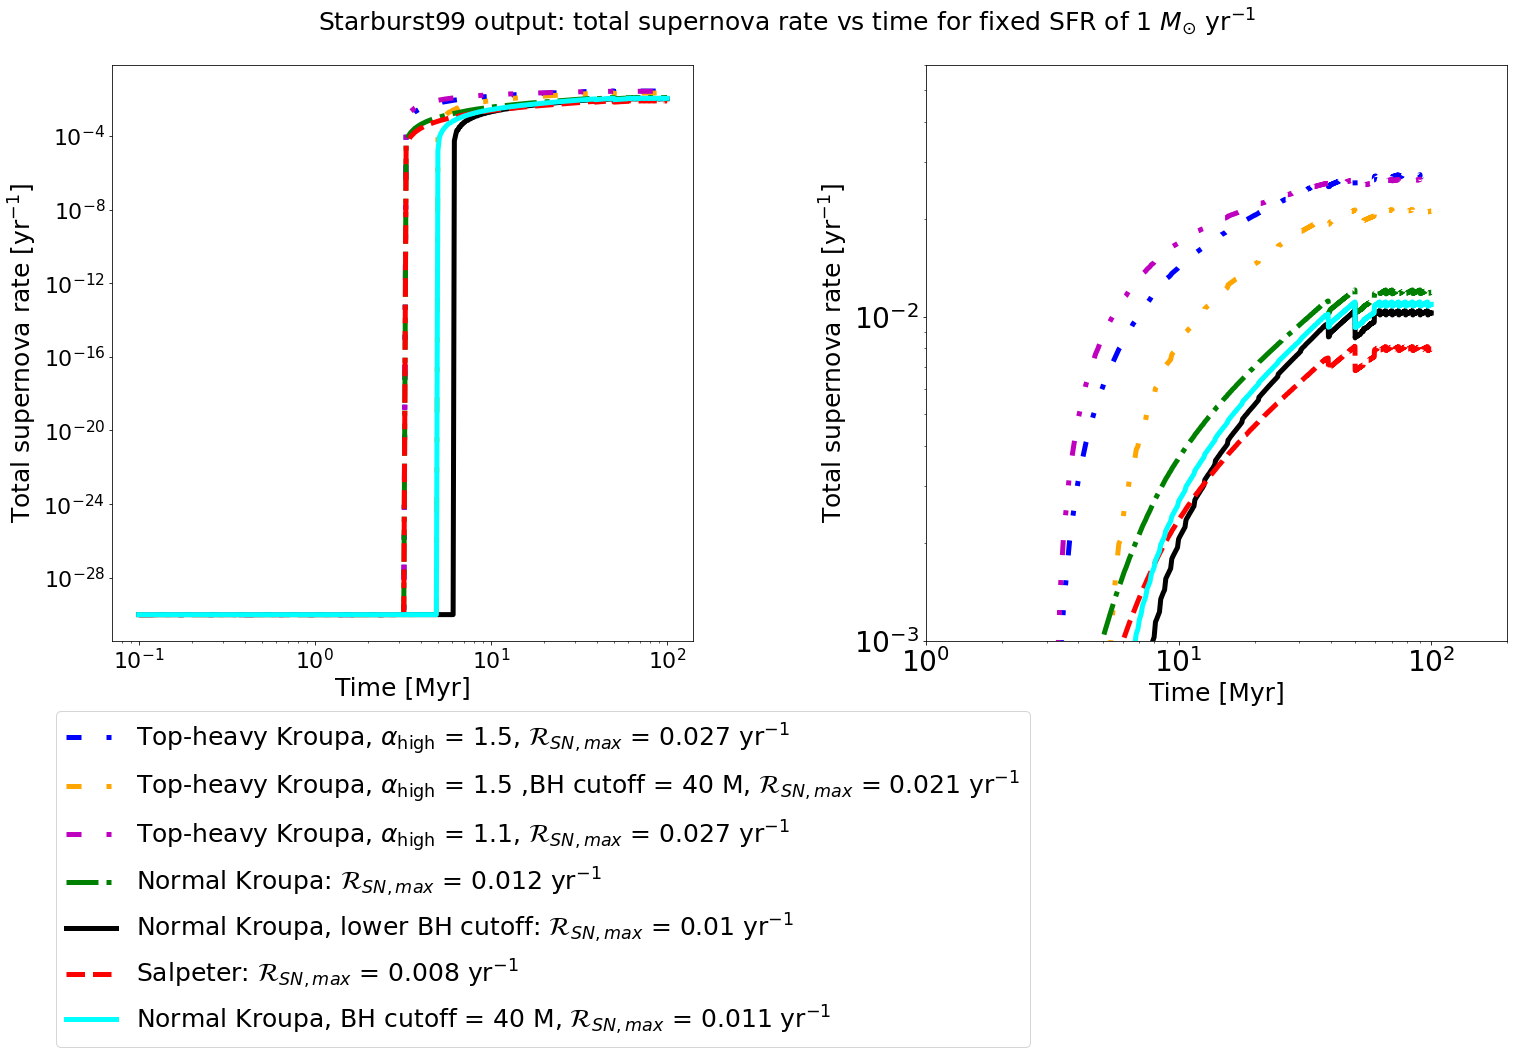

In [13]:
fig, axs = plt.subplots(1,2)

axs[1].set_xlim(1e6/1e6,2e8/1e6)
axs[1].set_ylim(1e-3,0.06)


fig.set_figheight(10)
fig.set_figwidth(25)


for i in range(2):
    axs[i].plot(SN_1M_TopHeavy_time/1e6 ,SN_rate_1M_TopHeavy ,c= 'b',linestyle = (0,(3,5,1,5,1,5)), linewidth = 5,
                label = 'Top-heavy Kroupa, $\\alpha_{\mathrm{high}}$ = 1.5, $\mathcal{R}_{SN,max}$ = ' + str(SN_TopHeavy_max) +' yr$^{-1}$')
    
    
    axs[i].plot(SN_1M_THKroupa_time_40BH/1e6 ,SN_rate_1M_THKroupa_40BH ,c= 'orange', linewidth = 5, linestyle = (0,(3,5,1,5,1,5)),
               label =  'Top-heavy Kroupa, $\\alpha_{\mathrm{high}}$ = 1.5 ,BH cutoff = 40 M, $\mathcal{R}_{SN,max}$ = ' +  str(SN_THKroupa40BH_max ) +' yr$^{-1}$')
    
    
    axs[i].plot(SN_1M_HeavyTopHeavy_time/1e6 ,SN_rate_1M_HeavyTopHeavy ,c= 'm',linestyle = (0,(3,5,1,5,1,5)), linewidth = 5,
                label = 'Top-heavy Kroupa, $\\alpha_{\mathrm{high}}$ = 1.1, $\mathcal{R}_{SN,max}$ = ' + str(SN_HeavyTopHeavy_max) +' yr$^{-1}$')
    
    
    axs[i].plot(SN_1M_Kroupa_time/1e6 ,SN_rate_1M_Kroupa, c= 'g', linewidth = 5, linestyle = 'dashdot', 
                label = 'Normal Kroupa: $\mathcal{R}_{SN,max}$ = ' + str(SN_Kroupa_max) +' yr$^{-1}$')
    
    
    axs[i].plot(SN_1M_Kroupa_time_30BH/1e6 ,SN_rate_1M_Kroupa_30BH, c= 'k', linewidth = 5,
                label =  'Normal Kroupa, lower BH cutoff: $\mathcal{R}_{SN,max}$ = ' +  str(SN_Kroupa30BH_max) +' yr$^{-1}$')
    
    
    
    axs[i].plot(SN_1M_Salpeter_time/1e6 ,SN_rate_1M_Salpeter ,c= 'r', linewidth = 5, linestyle ='dashed',
               label =  'Salpeter: $\mathcal{R}_{SN,max}$ = ' +  str(SN_Salpeter_max) +' yr$^{-1}$')
    
    
    axs[i].plot(SN_1M_Kroupa_time_40BH/1e6 ,SN_rate_1M_Kroupa_40BH ,c= 'cyan', linewidth = 5, linestyle ='solid'
               , label =  'Normal Kroupa, BH cutoff = 40 M, $\mathcal{R}_{SN,max}$ = ' +  str(SN_Kroupa40BH_max ) +' yr$^{-1}$')
    
   

    axs[i].set_ylabel("Total supernova rate [yr$^{-1}$]",fontsize = 25)
    axs[i].set_xlabel("Time [Myr]",fontsize = 25)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].tick_params(axis='both', labelsize=22)


plt.tick_params(axis='both', which='major', labelsize=28)


fig.suptitle("Starburst99 output: total supernova rate vs time for fixed SFR of 1 $M_{\odot}~$yr$^{-1}$", fontsize = 25)
axs[1].legend(loc = 'best' , fontsize = 25, bbox_to_anchor=[0.2, -0.1]) 
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.35)



Initially the SN rate is at zero is at zero because the stars did not finish their stellar evolution track. Then after about 50 Myr, stars consistently start to go supernova, which stabelizes after about 50 Myr. Applying this result to galaxies therefore requires a continious star-forming activity which has been going for maximally 100 Myr.

From the comparison between supernova rates for different IMFs, a few conclusions are drawn:
* The Salpeter IMF leads to a smaller supernova rate than the Kroupa IMF. The fundamental difference between these IMFs is the flattening of the Kroupa IMF exponent in the stellar-mass range < 0.5 $M_{\odot}$ as opposed to the Salpeter IMF. Therefore, if we imagine two gas reservoirs, each described by one of the two IMFs, we expect relatively more high-mass stars to be produced in the Kroupa reservoir, and therefore more stars eventually going supernova. By extension, one readily explains the lower supernova rate for the Salpeter IMF vs Top-heavy IMF.


* The black solid line shows the total supernova rate as function of time for a Kroupa IMF, but the black-hole cutoff mass is only 30 solar masses instead of 120 solar masses. The black-hole cutoff mass determines when stars immediately form black holes and therefore are not tracked as supernova. This explains why the black solid line has an onset of supernovae which is significantly later in time. Indeed, the most massive stars explode first because for stars
$\begin{equation}
\tau \propto M^{-2.5},
\end{equation}$
derived from the mass-luminosity relationship for stars with solar masses between 2 and 55 $M_{\odot}$, but these are not tracked as supernovae until stars of $\leq 30 M_{\odot}$ explode.


## Total supernova rate power over time for fixed star-formation rate

In [14]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')


Kroupanormal_typicalmass = np.array([i[7] for i in SN_1M_Kroupa])

SN_rate_1M_Kroupa_power = np.array([pow(10,i[1]) for i in SN_1M_Kroupa])*pow(31556926,-1)*1e51 


KroupatopH_typicalmass = np.array([i[7] for i in SN_1M_TopHeavy])

KroupaHtopH_typicalmass = np.array([i[7] for i in SN_1M_HeavyTopHeavy] )


Kroupanormal_power = np.array([pow(10,i[2]) for i in SN_1M_Kroupa])
Kroupanormal_energy = np.array([pow(10,i[3]) for i in SN_1M_Kroupa])

KroupatopH_power =  np.array([pow(10,i[2]) for i in SN_1M_TopHeavy])
KroupatopH_energy =  np.array([pow(10,i[3]) for i in SN_1M_TopHeavy])

KroupaHtopH_power = np.array([pow(10,i[2]) for i in SN_1M_HeavyTopHeavy])
KroupaHtopH_energy = np.array([pow(10,i[3]) for i in SN_1M_HeavyTopHeavy])



<Figure size 1000x600 with 0 Axes>

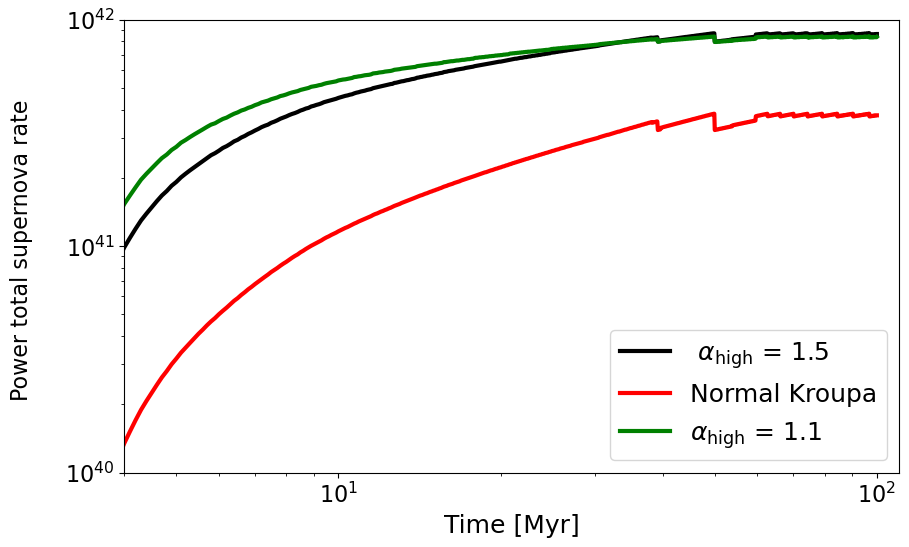

In [15]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(SN_1M_Kroupa_time/1e6, KroupatopH_power, linewidth = 3, color = 'k', label = " $\\alpha_{\mathrm{high}}$ = 1.5")

plt.plot(SN_1M_TopHeavy_time/1e6,Kroupanormal_power, linewidth = 3, color = 'red', label = 'Normal Kroupa')

plt.plot(SN_1M_HeavyTopHeavy_time/1e6,KroupaHtopH_power, linewidth = 3, color = 'g', label = "$\\alpha_{\mathrm{high}}$ = 1.1")


plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.ylim(1e40,1e42)
plt.xlim(4,110)
plt.xlabel('Time [Myr]', fontsize = 18)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Power total supernova rate \n ', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 18)


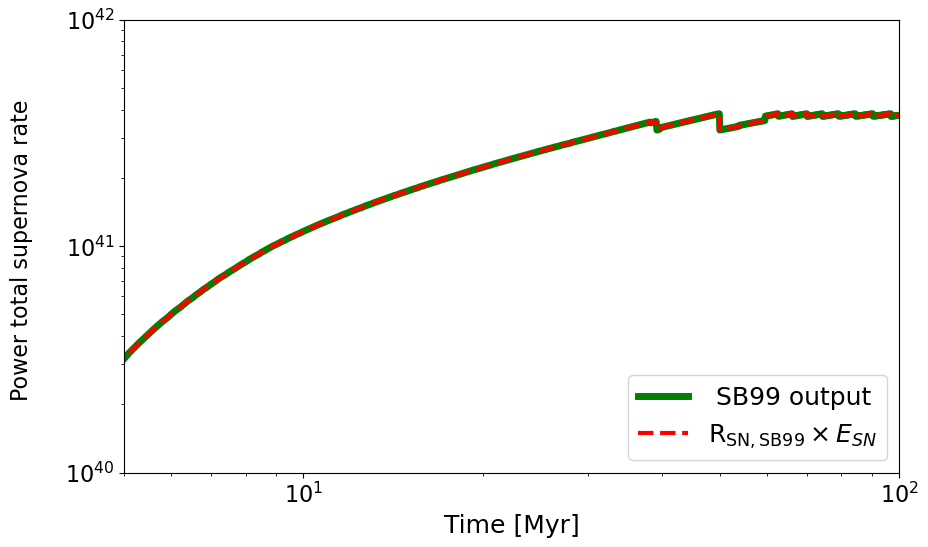

In [16]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')


plt.plot(SN_10M_Kroupa_time/1e6,SN_rate_1M_Kroupa_power, linewidth = 5, color = 'green', label = ' SB99 output')

plt.plot(SN_10M_Kroupa_time/1e6,Kroupanormal_power, linewidth = 3, color = 'red', label = 'R$_{\mathrm{SN,SB99}} \\times E_{SN}$', linestyle = '--')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(5,100)
plt.ylim(1e40,1e42)
plt.xlabel('Time [Myr]', fontsize = 18)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Power total supernova rate \n ', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 18)


$\textbf{IMPORTANT}$: This plot shows the total supernova-rate power as function of time. The solid green line shows the total supernova-rate power as given by starburst99 and the red-dashed line shows the total supernova-rate obtained from:

$\begin{equation}
Power = \mathcal{R}_{SN,SB99} \times E_{SN}
\end{equation}$

with E$_{SN}$ = 10$^{51}$ erg and $\mathcal{R}_{SN,SB99}$ the total supernova rate obtained from SB99. This allows to conclude that SB99 has a fixed power output per supernova. 

## Typical mass over time for fixed star-formation rate

1.872340425531915 14.1 1.3687943262411348


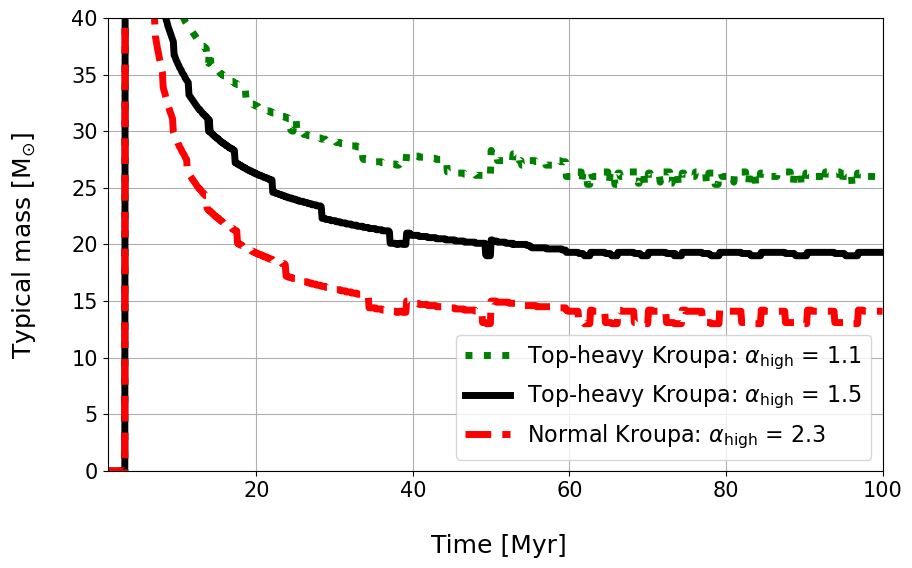

In [17]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(SN_1M_HeavyTopHeavy_time/1e6, KroupaHtopH_typicalmass, label = 'Top-heavy Kroupa: $\\alpha_{\mathrm{high}}$ = 1.1',color = 'g', linestyle = 'dotted',linewidth = 5)


plt.plot(SN_1M_Kroupa_time/1e6, KroupatopH_typicalmass, label = 'Top-heavy Kroupa: $\\alpha_{\mathrm{high}}$ = 1.5',color = 'k',linewidth = 5)


plt.plot(SN_1M_Kroupa_time/1e6,Kroupanormal_typicalmass, label = 'Normal Kroupa: $\\alpha_{\mathrm{high}}$ = 2.3',color = 'r', linestyle = '--', linewidth= 5)


plt.xlim(1,100)
plt.ylim(0,40)
plt.grid(True,"both")
plt.xticks(fontsize = 15)
plt.yticks(fontsize= 15)
plt.xlabel('\n Time [Myr]', fontsize = 18)
plt.ylabel('Typical mass [M$_{\odot}$] \n', fontsize = 18)
plt.legend(fontsize = 16)

print(KroupaHtopH_typicalmass[-1]/Kroupanormal_typicalmass[-1],Kroupanormal_typicalmass[-1], KroupatopH_typicalmass[-1]/Kroupanormal_typicalmass[-1])


# Stellar SED simulations

In [18]:
NK_spectrum = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Kroupa_1solM/YM_1Mcont_Kroupa.spectrum1",skiprows = 6)
TH_spectrum = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_TopHeavy_1solM/YM_1Mcont_TopHeavy.spectrum1",skiprows = 6)
Salp_spectrum = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Salpeter_1solM/Salpeter_normal.spectrum1",skiprows = 6)
NK10_spectrum = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Kroupa_10solM/YM.spectrum1",skiprows = 6)
NKLBH_spectrum = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_Kroupa_1solM_30BH/YM_1Mcont_Kroupa_30BH.spectrum1",skiprows = 6)
HTH_spectrum =  np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_HeavyTopHeavy_1solM/HeavyTopHeavy_1solM.spectrum1",skiprows = 8)
NK_40BH_spectrum = np.loadtxt("/Users/yarno/Documents/PhD/Starburst99/Output_NK_1M_40BH/YM_NK_1M_40BH.spectrum1",skiprows = 8)
from scipy import integrate


df = pd.DataFrame({ 'Time stamp': [i[0] for i in NK_spectrum], 'WL': [i[1] for i in NK_spectrum], 'Output_stellar': [pow(10,i[3]) for i in NK_spectrum]
})

df2 = pd.DataFrame({ 'Time stamp': [i[0] for i in TH_spectrum], 'WL': [i[1] for i in TH_spectrum], 'Output_stellar': [pow(10,i[3]) for i in TH_spectrum]
})

df3 = pd.DataFrame({ 'Time stamp': [i[0] for i in Salp_spectrum], 'WL': [i[1] for i in Salp_spectrum], 'Output_stellar': [pow(10,i[3]) for i in Salp_spectrum]
})

df4 = pd.DataFrame({ 'Time stamp': [i[0] for i in NK10_spectrum], 'WL': [i[1] for i in NK10_spectrum], 'Output_stellar': [pow(10,i[3]) for i in NK10_spectrum]
})

df5 = pd.DataFrame({ 'Time stamp': [i[0] for i in NKLBH_spectrum], 'WL': [i[1] for i in NKLBH_spectrum], 'Output_stellar': [pow(10,i[3]) for i in NKLBH_spectrum]
})

df6 = pd.DataFrame({ 'Time stamp': [i[0] for i in HTH_spectrum], 'WL': [i[1] for i in HTH_spectrum], 'Output_stellar': [pow(10,i[3]) for i in HTH_spectrum]
})

df7 = pd.DataFrame({ 'Time stamp': [i[0] for i in NK_40BH_spectrum], 'WL': [i[1] for i in NK_40BH_spectrum], 'Output_stellar': [pow(10,i[3]) for i in NK_40BH_spectrum]
})

## All dfs constructed here only contain the data at 100 Myr ##


df_1e8 = df.loc[(df['Time stamp' ] >= 0.1*1e9)]
df2_1e8 = df2.loc[(df2['Time stamp' ] >= 0.1*1e9)]#0.70*1e8) & (df2['Time stamp' ] < 0.72*1e8)]
df3_1e8 = df3.loc[(df3['Time stamp' ] >= 0.1*1e9)] # & (df3['Time stamp' ] < 0.72*1e8)]
df4_1e8 = df4.loc[(df4['Time stamp' ] >= 0.1*1e9)]# & (df4['Time stamp' ] < 0.72*1e8)]
df5_1e8 = df5.loc[(df5['Time stamp' ] >= 0.1*1e9)]# & (df5['Time stamp' ] < 0.72*1e8)]
df6_1e8 = df6.loc[(df6['Time stamp' ] >= 0.1*1e9)]# & (df6['Time stamp' ] < 0.72*1e8)]
df7_1e8 = df7.loc[(df7['Time stamp' ] >= 0.1*1e9)]# & (df6['Time stamp' ] < 0.72*1e8)]


WL_array_1e8 = df_1e8[['WL']].values
WL_array_1e8_2 = df2_1e8[['WL']].values
WL_array_1e8_3 = df3_1e8[['WL']].values
WL_array_1e8_4 = df4_1e8[['WL']].values
WL_array_1e8_5 = df5_1e8[['WL']].values
WL_array_1e8_6 = df6_1e8[['WL']].values
WL_array_1e8_7 = df7_1e8[['WL']].values

## All this data consists only to the 912 A < lambda < 3646 A wavelength range ##

WL_array_1e8_balmer = [i[0] for i in WL_array_1e8 if i > 912 and i < 3646]
WL_array_1e8_balmer_2 = [i[0] for i in WL_array_1e8_2 if i > 912 and i < 3646]
WL_array_1e8_balmer_3 = [i[0] for i in WL_array_1e8_3 if i > 912 and i < 3646]
WL_array_1e8_balmer_4 = [i[0] for i in WL_array_1e8_4 if i > 912 and i < 3646]
WL_array_1e8_balmer_5 = [i[0] for i in WL_array_1e8_5 if i > 912 and i < 3646]
WL_array_1e8_balmer_6 = [i[0] for i in WL_array_1e8_6 if i > 912 and i < 3646]
WL_array_1e8_balmer_7 = [i[0] for i in WL_array_1e8_7 if i > 912 and i < 3646]



output_stellar_1e8 = df_1e8[['Output_stellar']].values
output_stellar_1e8_2 = df2_1e8[['Output_stellar']].values
output_stellar_1e8_3 = df3_1e8[['Output_stellar']].values
output_stellar_1e8_4 = df4_1e8[['Output_stellar']].values
output_stellar_1e8_5 = df5_1e8[['Output_stellar']].values
output_stellar_1e8_6 = df6_1e8[['Output_stellar']].values
output_stellar_1e8_7 = df7_1e8[['Output_stellar']].values




output_stellar_1e8_balmer = [output_stellar_1e8[i][0] for i in range(len(output_stellar_1e8)) 
                      if WL_array_1e8[i] > 912 and WL_array_1e8[i] < 3646]

output_stellar_1e8_balmer_2 = [output_stellar_1e8_2[i][0] for i in range(len(output_stellar_1e8_2)) 
                      if WL_array_1e8_2[i] > 912 and WL_array_1e8_2[i] < 3646]

output_stellar_1e8_balmer_3 = [output_stellar_1e8_3[i][0] for i in range(len(output_stellar_1e8_3)) 
                      if WL_array_1e8_3[i] > 912 and WL_array_1e8_3[i] < 3646]

output_stellar_1e8_balmer_4 = [output_stellar_1e8_4[i][0] for i in range(len(output_stellar_1e8_4)) 
                      if WL_array_1e8_4[i] > 912 and WL_array_1e8_4[i] < 3646]

output_stellar_1e8_balmer_5 = [output_stellar_1e8_5[i][0] for i in range(len(output_stellar_1e8_5)) 
                      if WL_array_1e8_5[i] > 912 and WL_array_1e8_5[i] < 3646]

output_stellar_1e8_balmer_6 = [output_stellar_1e8_6[i][0] for i in range(len(output_stellar_1e8_6)) 
                      if WL_array_1e8_6[i] > 912 and WL_array_1e8_6[i] < 3646]

output_stellar_1e8_balmer_7 = [output_stellar_1e8_7[i][0] for i in range(len(output_stellar_1e8_7)) 
                      if WL_array_1e8_7[i] > 912 and WL_array_1e8_7[i] < 3646]




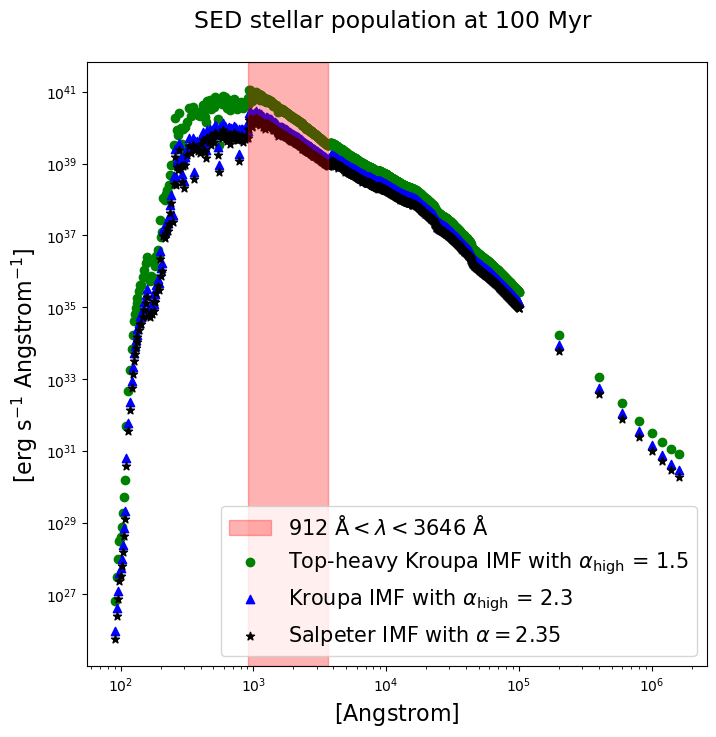

In [19]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(WL_array_1e8_2, output_stellar_1e8_2, label = "Top-heavy Kroupa IMF with $\\alpha_{\mathrm{high}}$ = 1.5", marker = "o",c = 'g')
plt.scatter(WL_array_1e8, output_stellar_1e8, label = "Kroupa IMF with $\\alpha_{\mathrm{high}}$ = 2.3", marker = "^", c= 'b')
plt.scatter(WL_array_1e8_3, output_stellar_1e8_3, label = "Salpeter IMF with $\\alpha = 2.35$", marker = "*", c= 'k')

plt.axvspan(912,3646, alpha = 0.3, color = 'red', label = '$912~\mathrm{\AA} < \\lambda < 3646~\mathrm{\AA}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[$\mathrm{Angstrom}$]', fontsize = 16)
plt.ylabel('[erg s$^{-1}$ $\mathrm{Angstrom}^{-1}$]', fontsize = 16)
plt.title("SED stellar population at 100 Myr \n ", fontsize = 17 )
plt.legend(fontsize = 15)



The stellar population evolved from a top-heavy Kroupa IMF shows relatively more emission in the Balmer range as opposed to the stellar population evolved from the normal Kroupa IMF. This suggests that heavier stars emit more strongly in UV. This is indeed the case: The emission of stellar radiation depends on their surface temperature and also on their activity. Therefore, emission is related to the evolution and spectral type of the star and it can be highly variable. A star's surface temperature determines its blackbody emission. A high-mass star on the main sequence will have a high surface temperature and emit a significant amount of UV.  

(1000.0, 4000.0)

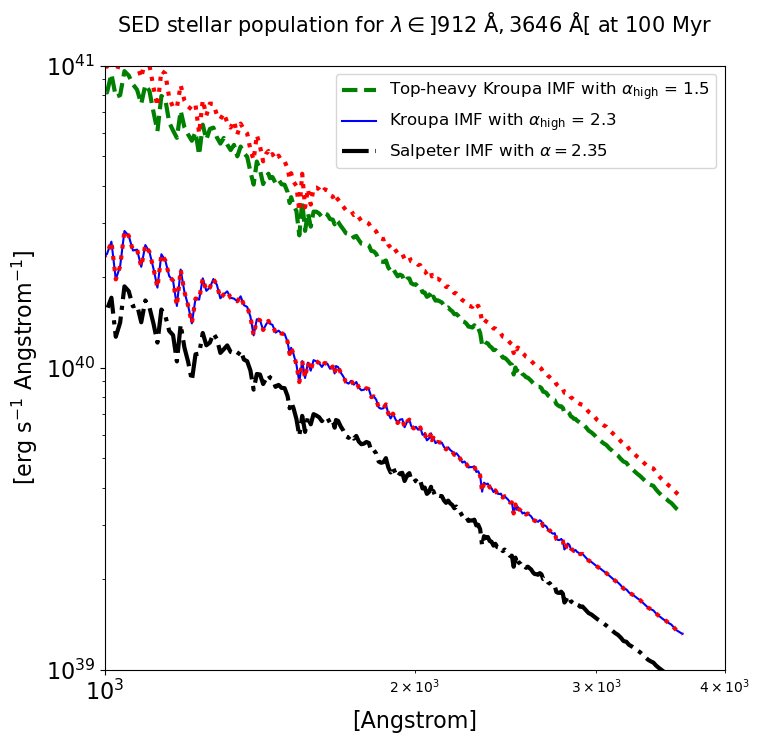

In [20]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
f = InterpolatedUnivariateSpline(WL_array_1e8_balmer,output_stellar_1e8_balmer, k=1)
f2 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_2,output_stellar_1e8_balmer_2, k=1)
f3 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_3,output_stellar_1e8_balmer_3, k=1)
f4 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_4,output_stellar_1e8_balmer_4, k=1)
f5 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_5,output_stellar_1e8_balmer_5, k=1)
f6 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_6,output_stellar_1e8_balmer_6, k=1)
f7 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_7,output_stellar_1e8_balmer_7, k=1)


plt.plot(WL_array_1e8_balmer_2, f2(WL_array_1e8_balmer_2),'g--', linewidth = 3, label = 'Top-heavy Kroupa IMF with $\\alpha_{\mathrm{high}}$ = 1.5')
plt.plot(WL_array_1e8_balmer, f(WL_array_1e8_balmer),'b', label = 'Kroupa IMF with $\\alpha_{\mathrm{high}}$ = 2.3')
plt.plot(WL_array_1e8_balmer_3, f3(WL_array_1e8_balmer_3),color = 'k', linestyle= 'dashdot' , linewidth = 3, label = 'Salpeter IMF with $\\alpha = 2.35$')
plt.plot(WL_array_1e8_balmer_7, f7(WL_array_1e8_balmer_7),color = 'r', linestyle= 'dotted' , linewidth = 3)
plt.plot(WL_array_1e8_balmer_6, f6(WL_array_1e8_balmer_6),color = 'r', linestyle= 'dotted' , linewidth = 3)


plt.xscale('log')
plt.yscale('log')
plt.xlabel('[Angstrom]', fontsize = 16)
plt.ylabel('[erg s$^{-1}$ $\mathrm{Angstrom}^{-1}$]', fontsize = 16)
plt.legend(fontsize = 12)

plt.title('SED stellar population for $\lambda \in ]912~\mathrm{\AA},3646~\mathrm{\AA}[$ at 100 Myr \n', fontsize = 15)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(1e39,1e41)
plt.xlim(1e3,4e3)

The 912 A < $\lambda$ < 3646 A = 91.2 nm < $\lambda$ < 364.6 nm is fully within the ultra-violet range [*]. The lower boundary of 912 A corresponds to E $\approx$ 13.6 eV, which is the energy required to ionize hydrogen.

The output in the Balmer range is larger for the top-heavy Kroupa IMF as opposed to the normal Kroupa IMF. This is due to the fact that the top-heavy Kroupa IMF results in a larger fraction of high-mass stars, which emit stronger UV fields as opposed to lower-mass stars. If one now assumes a constant SFR for these two IMFs, we expect the proportionality factor between the SFR and LIR to be smaller for the top-heavy Kroupa as the IR output from this stellar population will be larger.

http://labman.phys.utk.edu/phys222core/modules/m6/The%20EM%20spectrum.html

In [21]:
f = InterpolatedUnivariateSpline(WL_array_1e8_balmer,output_stellar_1e8_balmer, k=1)
Calib_NormalKroupa = pow(f.integral(min(WL_array_1e8_balmer), max(WL_array_1e8_balmer)),-1)

f2 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_2,output_stellar_1e8_balmer_2, k=1)
Calib_TopHeavyKroupa = pow(f2.integral(min(WL_array_1e8_balmer_2), max(WL_array_1e8_balmer_2)),-1)

f3 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_3,output_stellar_1e8_balmer_3, k=1)
Calib_Salpeter = pow(f3.integral(min(WL_array_1e8_balmer_3), max(WL_array_1e8_balmer_3)),-1)

f4 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_4,output_stellar_1e8_balmer_4, k=1)
Calib_10solMKroupa = pow(f4.integral(min(WL_array_1e8_balmer_4), max(WL_array_1e8_balmer_4)),-1)

f6 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_6,output_stellar_1e8_balmer_6, k=1)
Calib_HeavyTopHeavy = pow(f6.integral(min(WL_array_1e8_balmer_6), max(WL_array_1e8_balmer_6)),-1)

f7 = InterpolatedUnivariateSpline(WL_array_1e8_balmer_7,output_stellar_1e8_balmer_7, k=1)
Calib_NK40BH = pow(f7.integral(min(WL_array_1e8_balmer_7), max(WL_array_1e8_balmer_7)),-1)


In [22]:

def SN(LIR ,alpha_AGN, cali):
    if cali == "Normal Kroupa": 
        return SN_Kroupa40BH_max*Calib_NK40BH*pow(10,LIR)*(1-alpha_AGN)*3.826e33 #note that NK is for BH cutoff at M = 40 M
    
    elif cali == "Murphy_SB99":
        return (1/86.3)*3.88e-44*pow(10,LIR)*(1-alpha_AGN)*1e7*3.828e26
    
    
    elif cali == "Top-heavy Kroupa":
        return SN_TopHeavy_max*Calib_TopHeavyKroupa*pow(10,LIR)*(1-alpha_AGN)*3.826e33
    
    elif cali == "Salpeter":
        return SN_Salpeter_max*Calib_Salpeter*pow(10,LIR)*(1-alpha_AGN)*3.826e33
    
    elif cali == "Heavy-top heavy":
        return SN_HeavyTopHeavy_max*Calib_HeavyTopHeavy*(1-alpha_AGN)*pow(10,LIR)*3.826e33

In [26]:
d = [['Salpeter',Calib_Salpeter, SN_Salpeter_max, Calib_Salpeter*SN_Salpeter_max,SN(11.37, 0.04,'Salpeter')], 
     ['Normal Kroupa', Calib_NormalKroupa,SN_Kroupa_max,Calib_NormalKroupa*SN_Kroupa_max,SN(11.37, 0.04,'Normal Kroupa')], 
     ['Top-heavy Kroupa $\\beta_{\mathrm{high}} = 1.5$ ' , Calib_TopHeavyKroupa, SN_TopHeavy_max, Calib_TopHeavyKroupa*SN_TopHeavy_max,SN(11.37,0.04 ,'Top-heavy Kroupa') ],
     ['Top-heavy Kroupa $\\beta_{\mathrm{high}} = 1.1$ ', Calib_HeavyTopHeavy, SN_HeavyTopHeavy_max, Calib_HeavyTopHeavy*SN_HeavyTopHeavy_max,SN(11.37, 0.04,'Heavy-top heavy')],
     ['Kroupa Murphy ', 3.88e-44, 1/86.3, (1/86.3)*3.88e-44 ,SN(11.37, 0.04,'Murphy_SB99')]
    ]

df_calib = pd.DataFrame(d, columns = ['IMF', 'SFR <-> L$_{\mathrm{IR}}$', 'SNR <-> SFR', 'SNR <-> L$_{\mathrm{IR}}$', '$\mathcal{R}_{\mathrm{SN}}$'])
HTML(df_calib.to_html(index=False))


IMF,SFR <-> L$_{\mathrm{IR}}$,SNR <-> SFR,SNR <-> L$_{\mathrm{IR}}$,$\mathcal{R}_{\mathrm{SN}}$
Salpeter,7.477276e-44,0.008000,5.981821e-46,0.515050
Normal Kroupa,4.934702e-44,0.012000,5.921642e-46,0.467380
Top-heavy Kroupa $\beta_{\mathrm{high}} = 1.5$,1.537522e-44,0.027000,4.151310e-46,0.357438
Top-heavy Kroupa $\beta_{\mathrm{high}} = 1.1$,1.276870e-44,0.027000,3.447550e-46,0.296843
Kroupa Murphy,3.880000e-44,0.011587,4.495944e-46,0.387315
